<a href="https://colab.research.google.com/github/SuperZarija/Feature-selection-and-classification-of-breast-MRI-scans/blob/main/BigData_project_eng_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Big Data data analytics - Feature selection and classification of MRI images
# Teodora Jezdimirović E1 99/2022
# Aleksandra Zarija E1 98/2022

In [ ]:
# Loading table Annotation_Boxes.xls which contains data regarding slices with lesions and their coordinates
import pandas as pd

excel_data = pd.read_excel('G:\BigData\Baza\Annotation Boxes\Annotation_Boxes.xlsx')

# Printnig first 5 rows of the table excel_data
excel_data.head()


,Patient ID,Start Row,End Row,Start Column,End Column,Start Slice,End Slice
0,Breast_MRI_001,234,271,308,341,89,112
1,Breast_MRI_002,251,294,108,136,59,72
2,Breast_MRI_003,351,412,82,139,96,108
3,Breast_MRI_004,262,280,193,204,86,95
4,Breast_MRI_005,188,213,138,178,76,122


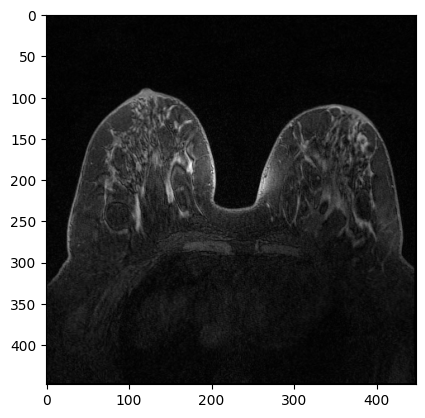

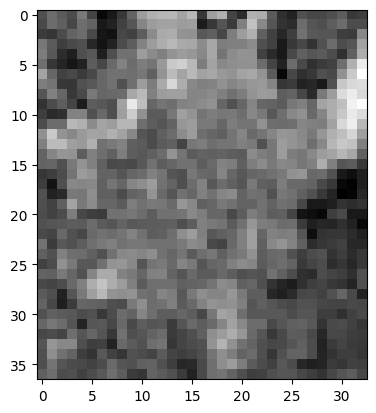

In [ ]:
import pydicom as dicom
import matplotlib.pyplot as plt

start_slice = excel_data.loc[0, "Start Slice"] # first slice from the series which contains lesion
end_slice = excel_data.loc[0, "End Slice"] # last slice from the series which contains lesion

# Lesion coordinates
sr = excel_data.loc[0, "Start Row"]
er = excel_data.loc[0, "End Row"]
sc = excel_data.loc[0, "Start Column"]
ec = excel_data.loc[0, "End Column"]

# Plotting central slice from the group of slices with lesions on them BEFORE
# contrast injection (that slice is chosen under the assumption that the lesion
# is most visible on it)
center_slice = (start_slice + end_slice) // 2
image_path = f'G:\\BigData\\Baza\\manifest-1694455414722\\Duke-Breast-Cancer-MRI\\Breast_MRI_001\\1.3.6.1.4.1.14519.5.2.1.186051521067863971269584893740842397538\\1.3.6.1.4.1.14519.5.2.1.185777849803665244536713316058283493877\\1-{center_slice:03d}.dcm'

ds = dicom.dcmread(image_path) # loading an image of the central slice in dicom format
plt.imshow(ds.pixel_array, cmap='gray') # ds.pixel_array is a picture of the central slice
plt.show()

segment = ds.pixel_array[sr:er, sc:ec] # part of the picture containing the lesion
plt.imshow(segment, cmap='gray')
plt.show()

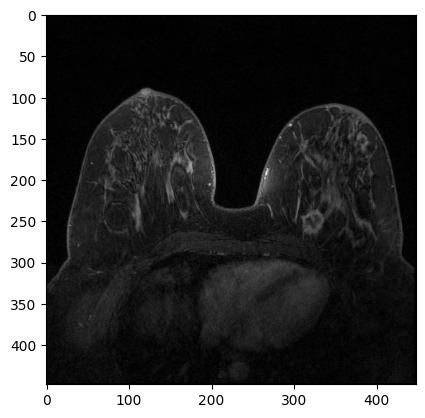

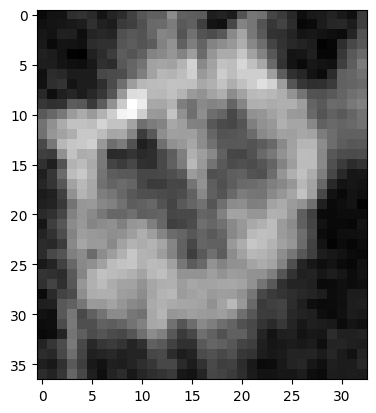

In [ ]:
# Ploting central slice from the group of slices with lesions on them in the
# first pass AFTER the contrast injection (that slice is chosen under the
# assumption that the lesion is most visible on it)

image_path = f'G:\\BigData\\Baza\\manifest-1694455414722\\Duke-Breast-Cancer-MRI\\Breast_MRI_001\\1.3.6.1.4.1.14519.5.2.1.186051521067863971269584893740842397538\\1.3.6.1.4.1.14519.5.2.1.15147203499230039585785258602759759529\\1-{center_slice:03d}.dcm'

ds = dicom.dcmread(image_path) # loading an image of the central slice in dicom format
plt.imshow(ds.pixel_array, cmap='gray') # ds.pixel_array is a picture of the central slice
plt.show()

segment = ds.pixel_array[sr:er, sc:ec] # part of the picture containing the lesion
plt.imshow(segment, cmap='gray')
plt.show()

In [ ]:
# Loading data from Excel file Breast-Cancer-MRI-filepath_filename-mapping.xls which will help us map different file paths

csv_data = pd.read_excel('G:\BigData\Baza\File Path mapping tables\Breast-Cancer-MRI-filepath_filename-mapping.xlsx')

csv_data.head() # printnig first 5 rows of the table csv_data

,sop_instance_UID,original_path_and_filename,classic_path,descriptive_path,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,series_sort
0,1.3.6.1.4.1.14519.5.2.1.1805789812895034139917...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01.dcm
1,1.3.6.1.4.1.14519.5.2.1.4903237729147735321973...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.3.6.1.4.1.14519.5.2.1.3061160038794820079325...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.3.6.1.4.1.14519.5.2.1.1574717199045785031549...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.3.6.1.4.1.14519.5.2.1.2594404476894572978078...,DICOM_Images/Breast_MRI_001/post_1/Breast_MRI_...,Duke-Breast-Cancer-MRI/Breast_MRI_001/1.3.6.1....,Duke-Breast-Cancer-MRI/BreastMRI001/01-01-1990...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Selecting slices containing lesions only from folders with images before
# contrast and first 2 passes after contrast
# (folders: pre, post_1, post_2)

import os         # required for navigating to the input data
import numpy as np
from skimage import io

load_root = "G:\BigData\Baza\manifest-1694455414722\\" # the starting segment of the path from which slices will be loaded
save_root = "G:\BigData\Baza\izdvojeni_slajsevi\\"     # the starting segment of the path on which slices will be saved

sub_folders = ["DICOM_Images", "lesion_masks", "non_lesion_masks"] # folders which will contain slices with lesions, masks that determine where the lesions are located and masks simetrical to them

for i in range(csv_data.shape[0]):                                # itertate through rows of csv_data

    original_path = csv_data.loc[i, "original_path_and_filename"].replace("/", "\\")
    p = original_path.split("\\")[2] # extraction of fields containing only the pass/series number

    if p == "post_1" or p == "post_2" or p == "pre":

        current_slice = int(original_path[-7:].split(".")[0]) # number of the current slice according to the path
        patient_num = int(original_path.split("\\")[1][-3:]) # extraction of the patient number according to the path

        # Storing the values of the first and last slice where the lesion is visible in variables
        start_slice = excel_data.loc[patient_num-1, "Start Slice"]
        end_slice = excel_data.loc[patient_num-1, "End Slice"]

        # Storing the lesion coordinates in variables
        sr = excel_data.loc[patient_num-1, "Start Row"]
        er = excel_data.loc[patient_num-1, "End Row"]
        sc = excel_data.loc[patient_num-1, "Start Column"]
        ec = excel_data.loc[patient_num-1, "End Column"]

        if current_slice >= start_slice and current_slice <= end_slice:

            # 1. Loading images from classic_path
            classic_path = csv_data.loc[i, "classic_path"].replace("/", "\\")
            load_path = load_root + classic_path
            ds = dicom.dcmread(load_path)

            for sub_f in sub_folders: # sub_f is a variable that can take one of the next values: DICOM_Images, lesion_masks, non_lesion_masks

                # 2. Making folders for storing slices/masks
                original_path = csv_data.loc[i, "original_path_and_filename"].replace("/", "\\")
                original_path = original_path.replace("DICOM_Images", sub_f)
                new_folder_path = os.path.split(save_root + original_path)[0] # path to the new folders
                #print(new_folder_path)

                if not os.path.exists(new_folder_path):
                   os.makedirs(new_folder_path)                               # making folders on the path

                # 3. Making path for storing slices/masks
                png_path = original_path[:-4] + ".png" # changing extension from dcm to png
                new_path = save_root + png_path        # path for storing slices/masks
                #print(new_path)

                # 4. Creating an image
                if sub_f == "DICOM_Images": # if it is a slice with a lesion, store it in the variable image
                    image = ds.pixel_array  # extracting an image from DICOM format
                else:                       # if it is "lesion_masks" or "non_lesion_masks"
                    image = np.zeros(ds.pixel_array.shape) # make a black image in dimensions of the image extracted form DICOM format
                    image[sr:er, sc:ec] = 255              # on the position of the lesions change colour of pixels to white
                    image = image.astype('uint8')
                    if sub_f == "non_lesion_masks":
                        image = np.flip(image, axis=1) # make a symetrical mask

                # 5. Saving the result image
                io.imsave(new_path, image, check_contrast = False)

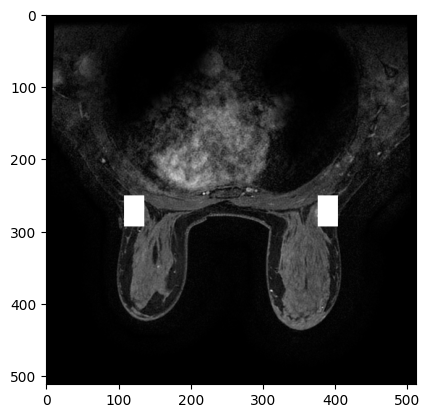

In [ ]:
# Example: Plotting combined images of lesion, mask and symetrical mask

patient_num = 2 #  1;  2;  3;   4;  5
slice_num = 65 # 100; 65; 102; 90; 99

img_path = f"G:\\BigData\\Baza\\izdvojeni_slajsevi\\DICOM_Images\\Breast_MRI_{patient_num:03d}\post_1\\Breast_MRI_{patient_num:03d}_post_1_{slice_num:03d}.png"
lesion_mask_path = f"G:\\BigData\\Baza\izdvojeni_slajsevi\\lesion_masks\Breast_MRI_{patient_num:03d}\\post_1\\Breast_MRI_{patient_num:03d}_post_1_{slice_num:03d}.png"
non_lesion_mask_path = f"G:\\BigData\\Baza\\izdvojeni_slajsevi\\non_lesion_masks\Breast_MRI_{patient_num:03d}\\post_1\\Breast_MRI_{patient_num:03d}_post_1_{slice_num:03d}.png"

img = io.imread(img_path)
lesion = io.imread(lesion_mask_path)
non_lesion = io.imread(non_lesion_mask_path)

new_img = img.copy()

new_img[lesion != 0] = np.max(img)
new_img[non_lesion != 0] = np.max(img)

plt.figure()
plt.imshow(new_img, cmap='gray')

In [ ]:
# Loading Excel table Clinical_and_Other_Features

clinical_features = pd.read_excel('G:\BigData\Baza\Clinical and other features\Clinical_and_Other_Features.xlsx', header=1)

In [ ]:
# Extraction of radiomics features

import glob
from radiomics import featureextractor # this module is for interaction with pyradiomics package

root = "G:\\BigData\\Baza\\izdvojeni_slajsevi\\DICOM_Images\\"

df = pd.DataFrame()

params = {}
params['label'] = 255
params['normalize'] = True  # image normalization

extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Selection of feature groups that are going to be used
extractor.disableAllFeatures()
extractor.enableFeatureClassByName('firstorder')
extractor.enableFeatureClassByName('glcm')
extractor.enableFeatureClassByName('glszm')
extractor.enableFeatureClassByName('glrlm')

patient_list = glob.glob(f'{root}/*')
for p_path in patient_list:
    patient_num = int(p_path.split("\\")[-1][-3:])
    bilateral = clinical_features.loc[patient_num, "Bilateral Information"] # information about existence of lesions on both breasts (0 = there are no lesions on breasts, 1 = there are lesions on breasts)

    # Storing the values of the first and last slice where the lesion is visible into variables

    start_slice = excel_data.loc[patient_num-1, "Start Slice"]
    end_slice = excel_data.loc[patient_num-1, "End Slice"]
    central_slice = (start_slice + end_slice)//2              # finding the central slice for the specific series

    series_list = glob.glob(f'{p_path}/*/') # making a list of paths to the folder containg the series

    for sr_path in series_list:

        series_name = sr_path.split("\\")[-2] # name of the series (it can be one of the following: pre, post_1 or post_2)

        if series_name == "pre":
            series_num = 0
        else:
            series_num = int(series_name[-1]) # series number is the last character from the series_name

        slices_list = glob.glob(f'{sr_path}/*') # list containing paths to specific slice images

        for sl_path in slices_list:             # analyzing every image

            if int(sl_path[-7:].split(".")[0]) == central_slice: # radiomics features are calculated only for the central slice, so we need to check if the current slice is the central one
                lesion_mask_path = sl_path.replace("DICOM_Images", "lesion_masks") # changing the path name to match path to lesion masks folder
                non_lesion_mask_path = sl_path.replace("DICOM_Images", "non_lesion_masks") # changing the path name to match path to non lesion masks folder

                result_lesion = extractor.execute(sl_path, lesion_mask_path) # calculating radiomics features in the case of the existing lesion (always interested in features regarding basic mask)

                # making a dictionary containig patient number, series number, central slice number, label (for basic mask label is 1), radiomics features
                res_lesion = {"PatientNumber" : patient_num, "Series" : series_num, "CentralSlice" : central_slice, "Label" : 1, **result_lesion}

                # adding dictionary to the data frame
                df = df.append(res_lesion, ignore_index = True)

                if bilateral == 0:        # only in case there is no bilateral cancer, find radiomics features for symetrical mask

                    result_non_lesion = extractor.execute(sl_path, non_lesion_mask_path)

                    # making a dictionary containig patient number, series number, central slice number, label (for symetrical mask label is 0), radiomics features
                    res_non_lesion = {"PatientNumber" : patient_num, "Series" : series_num, "CentralSlice" : central_slice, "Label" : 0, **result_non_lesion}

                    # adding dictionary to the data frame
                    df = df.append(res_non_lesion, ignore_index = True)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [ ]:
# Adapting the table (removing columns that are not significant)

df2 = df.drop(df.iloc[:, 4:26], axis=1)

df2.head(25) # printing the first 25 rows from new data frame

# Saving data frame 2 to a csv file

df2.to_csv("G:\\BigData\\Baza\\csv_files\\features_csv.csv")

In [ ]:
# Random spliting of patients without repetition
import random

total_patient_number = excel_data.shape[0] # in this case it's 922
v = np.arange(1, total_patient_number+1)
random.shuffle(v)
#print(v)

percentage = 0.85
num = int(len(v) * percentage)
train_indices = v[:num]
#print(train_indices)

percentage = 0.15
test_indices = v[num:]
#print(test_indices)

print("dataset size:", df2.shape)

df_train = df2[df2.PatientNumber.isin(train_indices)]
print("train size:", df_train.shape)

df_test = df2[df2.PatientNumber.isin(test_indices)]
print("test size:", df_test.shape)

dataset size: (6160, 78)
train size: (5240, 78)
test size: (920, 78)


In [ ]:
# Making csv files for training and test

df_train.to_csv("G:\BigData\Baza\csv_files\\features_train.csv")
df_test.to_csv("G:\BigData\Baza\csv_files\\features_test.csv")

df_train.head(10)

,PatientNumber,Series,CentralSlice,Label,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
8,2.0,1.0,65.0,1.0,-0.061857187461401224,2.556996286650195,3320.176714153213,0.5377066467301239,1.719024522579863,2.783691239554346,...,34.6468380106911,0.5396338058419244,4.251988980625706,22.663387743413516,0.12674871869351076,0.14431063122923588,76.7984649556411,0.2930329192588639,0.6328286459332667,0.20808398759026317
9,2.0,1.0,65.0,0.0,-0.2011105408732664,1.691300483912134,1056.1704543084456,0.8341247435456136,1.087066586581079,3.6211575178887476,...,13.607344003192091,0.5927337293750183,3.9990376547955986,49.289061688259046,0.16408995016575284,0.24294019933554817,23.917174538490105,0.3591083121266405,0.8005186753435076,0.2487557213224237
10,2.0,2.0,65.0,1.0,0.1191482828147786,3.0163593438946976,4504.199977330205,0.35567403327171987,1.8578673523107478,2.680207847886154,...,48.814047940118826,0.5062808609073852,4.263249501982285,15.964581343453297,0.11250373395869828,0.11524086378737541,103.75911715211484,0.28988210413000937,0.5313095996879149,0.22952523024053292
11,2.0,2.0,65.0,0.0,-0.07175422518843101,2.1136520977736852,1865.4833975243114,0.6044097459251032,1.3560035677025815,3.8466711856048983,...,17.783524109432815,0.5670666549905624,4.038229420194865,38.98442716163435,0.15855029640783888,0.19850498338870431,37.60976789726858,0.3685739167925288,0.7046811694099917,0.2845471036381632
12,2.0,3.0,65.0,1.0,-0.08292897358702116,2.702576181085613,3317.4578075729432,0.5959505330633751,1.7987261834772523,2.5821882942742524,...,29.86942178470547,0.5614338421535371,4.260129337769403,23.641977894399044,0.12297670178950323,0.15759966777408638,63.30637450296836,0.31069440775435725,0.6116173493811384,0.2354636723476619
13,2.0,3.0,65.0,0.0,-0.08538792940858951,2.178818591091553,1924.65729798113,0.59381570010881,1.3511962239518116,4.374664667715801,...,23.623859396534087,0.5530646002465653,4.300723218974014,26.241625043068176,0.12772230392730913,0.16549003322259137,45.44307526791511,0.3296950871314848,0.6735285909113662,0.24373671118651458
14,2.0,0.0,65.0,1.0,0.01295419786580867,2.7521314666704173,3696.0601136853156,0.45997951995243946,1.9063652979475556,1.8904592457197988,...,35.239638973405455,0.5403098236421005,4.246884534583495,24.006781045751634,0.13706676498699047,0.1405730897009967,79.5347190989916,0.3482907806720329,0.6732930418652534,0.26704021537372785
15,2.0,0.0,65.0,0.0,-0.24463054654227684,2.05593808878542,1497.5073384941938,0.7923226303372867,1.2760142556543206,2.7593533417948493,...,17.29466191617752,0.5788521514226076,4.136498359482244,41.14737655401924,0.15617896222202407,0.21490863787375414,30.057476317644944,0.3663184066343969,0.7796679216492305,0.2629810278806885
16,3.0,1.0,102.0,1.0,0.1611131182187768,4.9483057530668475,27489.586391310164,0.3278786054219045,2.471604437866932,3.955093038167906,...,108.86363179803479,0.5406275523186704,4.673183732088456,36.46088734711246,0.12209222282492017,0.08362093758987632,272.0100154948907,0.3360751075893794,0.6445704594465778,0.2589512696250799
17,3.0,2.0,102.0,1.0,0.3692557020121215,5.602335918173722,36771.539995111336,0.17929625155312046,2.787987581348493,4.138244241191529,...,164.6766031671362,0.4949567946364386,4.6458064170739,25.692820669435235,0.11781385766121649,0.06212251941328732,371.82632575324794,0.33211837057891375,0.5845915114512076,0.2690000853608403


In [ ]:
# Loading training and test sets into pandas dataframe from csv file

df_train = pd.read_csv("features_train.csv")
df_test = pd.read_csv("features_test.csv")

df_train.head()

,Unnamed: 0,PatientNumber,Series,CentralSlice,Label,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,0,1.0,1.0,100.0,1.0,-0.173459,3.021002,4086.921226,0.645246,2.165736,...,45.344756,0.602900,4.097579,26.568043,0.163498,0.132064,101.302475,0.390232,0.884571,0.266648
1,1,1.0,1.0,100.0,0.0,-0.173459,2.804428,2299.544073,0.804392,0.758008,...,10.477002,0.588085,3.669964,76.911254,0.219710,0.281532,20.270343,0.451048,1.001275,0.313492
2,2,1.0,2.0,100.0,1.0,-0.095952,2.619953,3599.118554,0.542126,1.758871,...,51.599385,0.561469,4.161928,21.764686,0.146090,0.119369,114.125612,0.346826,0.801041,0.233272
3,3,1.0,2.0,100.0,0.0,-0.147683,3.007939,2629.940425,0.701489,0.801838,...,11.466239,0.574691,3.723224,65.107397,0.204375,0.256347,23.685678,0.440578,0.891559,0.327832
4,4,1.0,0.0,100.0,1.0,-0.158969,1.007766,459.899524,0.664091,0.583368,...,25.300521,0.591431,3.963530,45.251614,0.196600,0.185299,61.047226,0.430064,0.923819,0.306626


In [ ]:
# Creating different combinations of data based on series to determine which
# series contributes the most to the classification

# First combination - all data from the table

# df_train_s1 = df_train

# Second combination - series before contrast injection

df_train_s2 = df_train[df_train.Series.isin([0])]
df_train_s2.head(10)

df_test_s2 = df_test[df_test.Series.isin([0])]
df_test_s2.head(10)

# Third combination - first series after contrast injection

df_train_s3 = df_train[df_train.Series.isin([1])]
df_train_s3.head(10)

df_test_s3 = df_test[df_test.Series.isin([1])]
df_test_s3.head(10)

# Fourth combination - first 2 series after contrast injection

df_train_s4 = df_train[df_train.Series.isin([1, 2])]
df_train_s4.head(10)

df_test_s4 = df_test[df_test.Series.isin([1, 2])]
df_test_s4.head(10)

,Unnamed: 0,PatientNumber,Series,CentralSlice,Label,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,135,26.0,1.0,171.0,1.0,-0.210580,8.739132,40884.964319,6.307286e-01,5.342744,...,52.004844,0.593441,4.523328,25.634551,0.118740,0.123543,114.176017,0.312838,0.607451,0.239185
1,136,26.0,1.0,171.0,0.0,0.404944,1.242056,1411.014930,3.825209e-02,0.449332,...,231.917048,0.305714,3.406463,15.700368,0.296867,0.041812,177.974682,0.076365,0.147415,0.058603
2,137,26.0,2.0,171.0,1.0,-0.151462,8.814133,42403.074411,5.668242e-01,5.708474,...,57.444875,0.575080,4.502498,22.720911,0.111196,0.116259,127.609727,0.293189,0.568529,0.224354
3,138,26.0,2.0,171.0,0.0,0.461376,1.278493,1516.665646,-3.203427e-16,0.408559,...,1151.835366,1.000000,2.620790,21.896341,0.513980,0.035985,68.619274,0.020061,0.020061,0.020061
6,159,30.0,1.0,110.0,1.0,-0.038868,2.197417,2994.308662,5.169643e-01,1.094035,...,40.212515,0.561096,4.244090,30.087040,0.147422,0.138254,93.287974,0.363386,0.693069,0.280966
7,160,30.0,2.0,110.0,1.0,0.033684,2.726767,4047.783971,4.321294e-01,1.310879,...,52.407667,0.537317,4.319711,21.533464,0.125565,0.115904,117.177944,0.334408,0.604166,0.266968
9,180,35.0,1.0,102.0,1.0,-0.129453,3.332845,13184.151399,5.728978e-01,2.031997,...,72.092204,0.607861,4.531634,44.642284,0.123084,0.113492,178.404757,0.329101,0.535132,0.277594
10,181,35.0,2.0,102.0,1.0,-0.020701,4.221946,19088.515141,4.870118e-01,2.338523,...,106.609474,0.588709,4.777540,26.513130,0.095031,0.087130,245.002608,0.282250,0.409794,0.250365
12,231,45.0,1.0,66.0,1.0,0.577599,8.055565,87167.165047,1.038648e-01,5.060744,...,271.600434,0.450523,4.549370,20.362879,0.117690,0.045615,552.434512,0.301577,0.489058,0.254706
13,232,45.0,2.0,66.0,1.0,0.566749,8.016840,85314.142971,1.337875e-01,4.950937,...,230.958255,0.474589,4.538900,24.817558,0.122427,0.051915,512.401867,0.327249,0.551044,0.271300


In [ ]:
# Selecting columns that contain data and labels from tables for training and test

X1_train = df_train.iloc[:, 5:]
y1_train = df_train.iloc[:, 4]

X1_test = df_test.iloc[:, 5:]
y1_test = df_test.iloc[:, 4]

#
X2_train = df_train_s2.iloc[:, 5:]
y2_train = df_train_s2.iloc[:, 4]

X2_test = df_test_s2.iloc[:, 5:]
y2_test = df_test_s2.iloc[:, 4]

#
X3_train = df_train_s3.iloc[:, 5:]
y3_train = df_train_s3.iloc[:, 4]

X3_test = df_test_s3.iloc[:, 5:]
y3_test = df_test_s3.iloc[:, 4]

#
X4_train = df_train_s4.iloc[:, 5:]
y4_train = df_train_s4.iloc[:, 4]

X4_test = df_test_s4.iloc[:, 5:]
y4_test = df_test_s4.iloc[:, 4]

In [ ]:
# Printing the beginning of the table with all data (training set)
X1_train.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
0,-0.173459,3.021002,4086.921226,0.645246,2.165736,1.885791,4.699447,1.029072,1.384993,1.315485,...,45.344756,0.602900,4.097579,26.568043,0.163498,0.132064,101.302475,0.390232,0.884571,0.266648
1,-0.173459,2.804428,2299.544073,0.804392,0.758008,5.101398,4.618232,0.856669,0.708866,0.259688,...,10.477002,0.588085,3.669964,76.911254,0.219710,0.281532,20.270343,0.451048,1.001275,0.313492
2,-0.095952,2.619953,3599.118554,0.542126,1.758871,2.000873,3.913241,0.889083,1.370580,1.533591,...,51.599385,0.561469,4.161928,21.764686,0.146090,0.119369,114.125612,0.346826,0.801041,0.233272
3,-0.147683,3.007939,2629.940425,0.701489,0.801838,5.018594,4.896139,0.905006,0.787806,0.292035,...,11.466239,0.574691,3.723224,65.107397,0.204375,0.256347,23.685678,0.440578,0.891559,0.327832
4,-0.158969,1.007766,459.899524,0.664091,0.583368,3.438825,2.142092,0.361534,0.404491,0.359580,...,25.300521,0.591431,3.963530,45.251614,0.196600,0.185299,61.047226,0.430064,0.923819,0.306626


In [ ]:
# kNN klasifikacija (scikit-learn)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

# Making lists with training and test data in 4 different combinations
X_train_list = [X1_train, X2_train, X3_train, X4_train]
X_test_list = [X1_test, X2_test, X3_test, X4_test]

y_train_list = [y1_train, y2_train, y3_train, y4_train]
y_test_list = [y1_test, y2_test, y3_test, y4_test]

# Finding the best parameters for the model
parameters = {"n_neighbors" : [1, 2, 3, 5, 10], "metric" : ("euclidean", "chebyshev", "manhattan", "hamming")}

for X, y in zip(X_train_list, y_train_list):

  clf = KNeighborsClassifier()
  clf_gs = GridSearchCV(clf, parameters)

  clf_gs.fit(X, y)

  print(clf_gs.best_score_)
  print(clf_gs.best_params_)

conf_mat_list = []
acc_list = []

# kNN classification for all 4 combinations of data
for X, y, X_test, y_test in zip(X_train_list, y_train_list, X_test_list, y_test_list):

  classifier = KNeighborsClassifier(n_neighbors = clf_gs.best_params_['n_neighbors'], metric = clf_gs.best_params_['metric'])
  classifier.fit(X, y)

  y_pred = classifier.predict(X_test)

  # confusion matrices
  conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
  conf_mat_list.append(conf_mat)

  # accuracy
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

0.7350662678864649
{'metric': 'manhattan', 'n_neighbors': 10}
0.6585036998040421
{'metric': 'euclidean', 'n_neighbors': 5}
0.7572753063671727
{'metric': 'manhattan', 'n_neighbors': 3}
0.772967627085119
{'metric': 'manhattan', 'n_neighbors': 5}


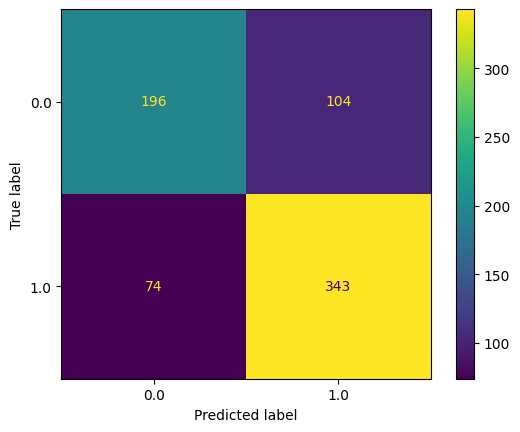

Accuracy is 75.17 %


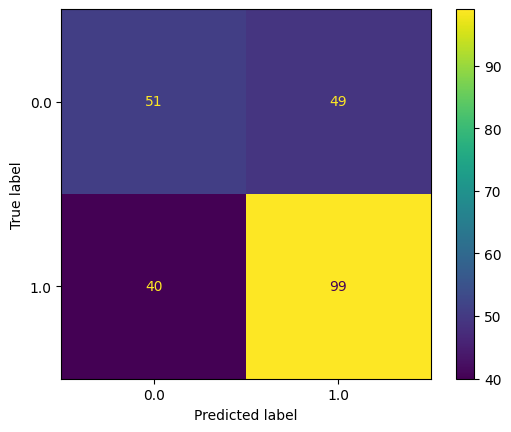

Accuracy is 62.76 %


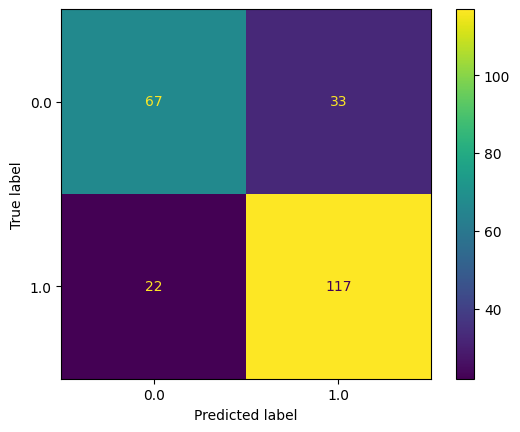

Accuracy is 76.99 %


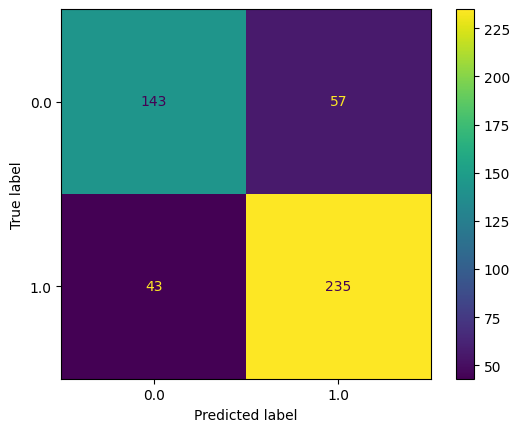

Accuracy is 79.08 %


In [ ]:
# Plotting confusion matrices for all 4 data combinations

for conf_mat, acc in zip(conf_mat_list, acc_list):

  disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_)
  disp.plot()
  plt.show()

  print('Accuracy is', round(acc * 100, 2), '%')

In [ ]:
# Spark settings

!pip install pyspark --quiet

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

sc=spark.sparkContext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# Loading tables with training and test data into Apache Spark
df_train = spark.read.load("features_train.csv", format = "csv", inferSchema = "true", header = "true")
df_test = spark.read.load("features_test.csv", format = "csv", inferSchema = "true", header = "true")

df_train.show(5)

+---+-------------+------+------------+-----+--------------------------------+--------------------------------+--------------------------+---------------------------+--------------------------------------+----------------------------+---------------------------+-----------------------------------------+------------------------+--------------------------+---------------------------+-------------------------+-----------------------------------------------+-----------------------------------+----------------------------+-------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------------+--------------------------+-----------------------------+----------------------+-------------------------+-------------------------------+-------------------------------+--------------------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+---

In [ ]:
# First combination - all data from the table
series_list_1 = [0, 1, 2]
# Second combination - series before contrast injection
series_list_2 = [0]
# Third combination - first series after contrast injection
series_list_3 = [1]
# Fourth combination - first 2 series after contrast injection
series_list_4 = [1, 2]

series_lists = [series_list_1, series_list_2, series_list_3, series_list_4]

# empty lists which will contain all combinations for train and test dataframe
df_train_list = []
df_test_list = []


for s_list in series_lists:
  df = df_train.filter(df_train.Series.isin(s_list))
  df = df.select(df.columns[4:])
  #df.show(5)
  df_train_list.append(df)

  df = df_test.filter(df_test.Series.isin(s_list))
  df = df.select(df.columns[4:])
  #df.show(5)
  df_test_list.append(df)

df_train_list[1].show(5)

+-----+--------------------------------+--------------------------------+--------------------------+---------------------------+--------------------------------------+----------------------------+---------------------------+-----------------------------------------+------------------------+--------------------------+---------------------------+-------------------------+-----------------------------------------------+-----------------------------------+----------------------------+-------------------------------+------------------------------+----------------------------+-----------------------------+-------------------------------+--------------------------+-----------------------------+----------------------+-------------------------+-------------------------------+-------------------------------+--------------------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+-----------------------------+-----------

In [ ]:
# Column numbers (features + labels)
print(len(df_train_list[1].columns))

75


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder


In [ ]:
# Making a dataframe in which all features are concatenated into one vector

vec_asmbl = VectorAssembler(inputCols=df_train_list[0].columns[1:], outputCol="features")

# The extension 'v' represents lists containing dataframes with vectorized features
df_train_list_v = []
df_test_list_v = []

for df_train, df_test in zip(df_train_list, df_test_list):
  df_train_v = vec_asmbl.transform(df_train).select("features", "Label")
  df_test_v = vec_asmbl.transform(df_test).select("features", "Label")

  df_train_list_v.append(df_train_v)
  df_test_list_v.append(df_test_v)

df_train_list_v[1].show(5)

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|[-0.1589690956596...|  1.0|
|[-0.1589690956596...|  0.0|
|[0.01295419786580...|  1.0|
|[-0.2446305465422...|  0.0|
|[0.34147133198077...|  1.0|
+--------------------+-----+
only showing top 5 rows



In [ ]:
# Feature selector - selecting the features with highest contribution to classification

from pyspark.ml.feature import VarianceThresholdSelector
from pyspark.ml.feature import ChiSqSelector

selector = VarianceThresholdSelector(varianceThreshold = 0.6, outputCol = "selectedFeatures")
#selector = ChiSqSelector(numTopFeatures=17, outputCol="selectedFeatures")

# the extension 's' represents lists containing dataframes with selected features
df_train_list_s = []
df_test_list_s = []

for df_train_v, df_test_v in zip(df_train_list_v, df_test_list_v):

  sel_model = selector.fit(df_train_v)
  df_train_s = sel_model.transform(df_train_v)
  df_train_list_s.append(df_train_s)

  df_test_s = sel_model.transform(df_test_v)
  df_test_list_s.append(df_test_s)

print("Features selected by VarianceThresholdSelector:")
df_train_list_s[1].show(5)

Features selected by VarianceThresholdSelector:
+--------------------+-----+--------------------+
|            features|Label|    selectedFeatures|
+--------------------+-----+--------------------+
|[-0.1589690956596...|  1.0|[1.00776603633126...|
|[-0.1589690956596...|  0.0|[3.11437113575936...|
|[0.01295419786580...|  1.0|[2.75213146667041...|
|[-0.2446305465422...|  0.0|[2.05593808878542...|
|[0.34147133198077...|  1.0|[4.51530476414041...|
+--------------------+-----+--------------------+
only showing top 5 rows



In [ ]:
# Printing names of selected features

selected_features = np.array(df_train_list[0].columns)[sel_model.selectedFeatures]

print(sel_model.selectedFeatures)
print(selected_features)
print(len(selected_features))

[1, 2, 4, 5, 6, 8, 9, 11, 13, 14, 15, 17, 18, 42, 46, 47, 48, 50, 55, 57, 58, 62, 63, 64, 66, 67, 70]
['original_firstorder_10Percentile' 'original_firstorder_90Percentile'
 'original_firstorder_Entropy' 'original_firstorder_InterquartileRange'
 'original_firstorder_Kurtosis'
 'original_firstorder_MeanAbsoluteDeviation' 'original_firstorder_Mean'
 'original_firstorder_Minimum'
 'original_firstorder_RobustMeanAbsoluteDeviation'
 'original_firstorder_RootMeanSquared' 'original_firstorder_Skewness'
 'original_firstorder_Uniformity' 'original_firstorder_Variance'
 'original_glcm_SumSquares' 'original_glszm_HighGrayLevelZoneEmphasis'
 'original_glszm_LargeAreaEmphasis'
 'original_glszm_LargeAreaHighGrayLevelEmphasis'
 'original_glszm_LowGrayLevelZoneEmphasis'
 'original_glszm_SmallAreaLowGrayLevelEmphasis'
 'original_glszm_ZonePercentage' 'original_glszm_ZoneVariance'
 'original_glrlm_HighGrayLevelRunEmphasis'
 'original_glrlm_LongRunEmphasis'
 'original_glrlm_LongRunHighGrayLevelEmphasis'


In [ ]:
# Extracting selected features and labels from the dataframe and renaming the
# 'selectedFeatures' column to 'features' to make final dataframes

# the extension 'f' represents lists containing final dataframes
df_train_list_f = []
df_test_list_f = []

for df_train, df_test in zip(df_train_list_s, df_test_list_s):

  df_train_f = df_train.select("selectedFeatures", "Label").withColumnRenamed('selectedFeatures', 'features')
  df_test_f = df_test.select("selectedFeatures", "Label").withColumnRenamed('selectedFeatures', 'features')

  df_train_list_f.append(df_train_f)
  df_test_list_f.append(df_test_f)


df_train_list_f[1].show(5)

+--------------------+-----+
|            features|Label|
+--------------------+-----+
|[1.00776603633126...|  1.0|
|[3.11437113575936...|  0.0|
|[2.75213146667041...|  1.0|
|[2.05593808878542...|  0.0|
|[4.51530476414041...|  1.0|
+--------------------+-----+
only showing top 5 rows



In [ ]:
# Result evaluation using AUROC
evaluator = BinaryClassificationEvaluator(labelCol='Label', metricName='areaUnderROC')
evaluator_multi = MulticlassClassificationEvaluator(labelCol="Label", metricName='accuracy')

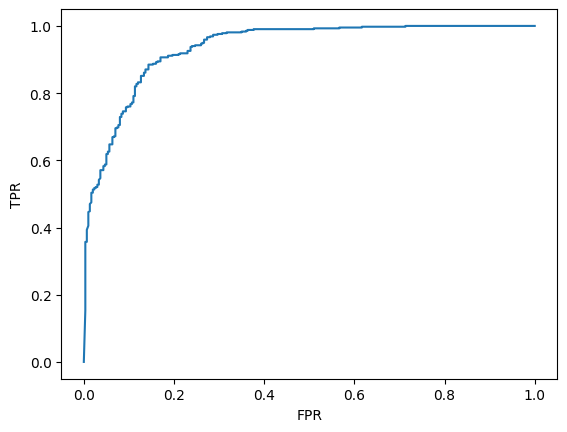

AUROC is 93.62 %
Accuracy is 85.77 %




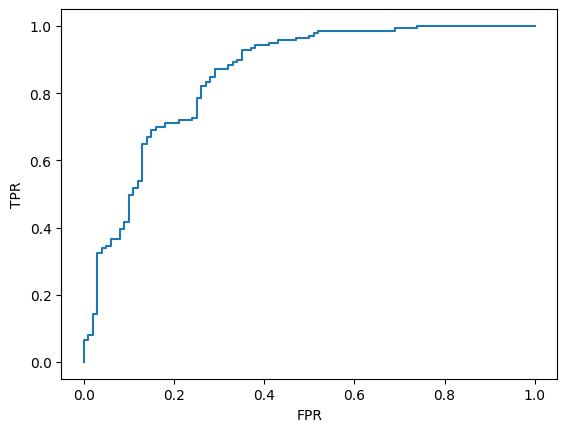

AUROC is 85.3 %
Accuracy is 80.75 %




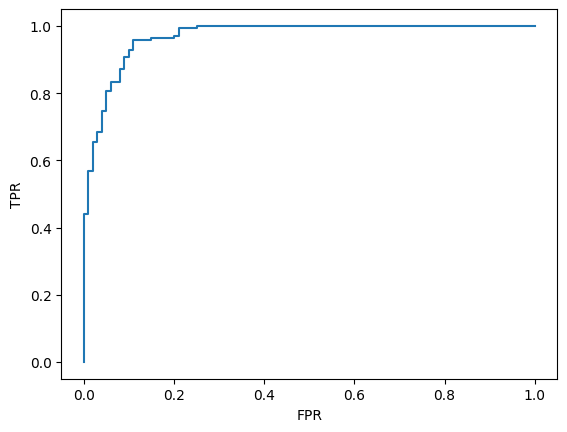

AUROC is 96.86 %
Accuracy is 91.21 %




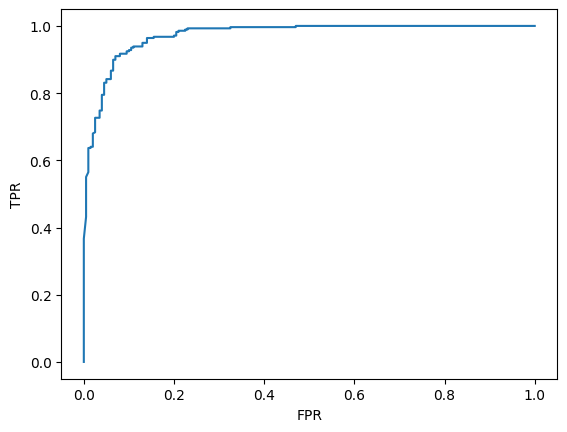

AUROC is 97.23 %
Accuracy is 91.63 %




In [ ]:
# RandomForest classification
from pyspark.ml.functions import vector_to_array
from sklearn.metrics import roc_curve

rf = RandomForestClassifier(labelCol='Label', featuresCol='features')

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [100, 200, 500]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .addGrid(rf.impurity, ['entropy', 'gini']) \
    .build()

# Create the cross-validator
cross_validator = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5, seed=42)

models = []
accs = []
aurocs = []

for df_train, df_test in zip(df_train_list_f, df_test_list_f):

  model = cross_validator.fit(df_train)
  models.append(model)
  pred = model.transform(df_test)

  # roc curve
  y_score = pred.select(vector_to_array("probability")[1]).rdd.keys().collect()
  y_true = pred.select("Label").rdd.keys().collect()
  fpr, tpr, thresholds = roc_curve(y_true, y_score)

  plt.figure()
  plt.plot(fpr, tpr)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.show()

  # auroc
  auroc = evaluator.evaluate(pred)
  print('AUROC is', round(auroc * 100, 2), '%')
  aurocs.append(auroc)

  # accuracy
  acc = evaluator_multi.evaluate(pred)
  print('Accuracy is', round(acc * 100, 2), '%')
  print("\n")
  accs.append(acc)

In [ ]:
i = 0
for model in models:
  print(model.getEstimatorParamMaps()[np.argmax(model.avgMetrics)])
  model.bestModel.save("rf_model_" + str(i))
  i += 1


{Param(parent='RandomForestClassifier_3a598c20bec2', name='numTrees', doc='Number of trees to train (>= 1).'): 200, Param(parent='RandomForestClassifier_3a598c20bec2', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 15, Param(parent='RandomForestClassifier_3a598c20bec2', name='impurity', doc='Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini'): 'entropy'}
{Param(parent='RandomForestClassifier_3a598c20bec2', name='numTrees', doc='Number of trees to train (>= 1).'): 100, Param(parent='RandomForestClassifier_3a598c20bec2', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 5, Param(parent='RandomForestClassifier_3a598c20bec2', name='impurity', doc='Criterion used for information gain calculation (case-insensitive)

In [ ]:
# convert raw predictions to probabilities

from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType


def platt_scale(rawPrediction):
    rawPrediction = float(rawPrediction[0])
    prob = 1.0 / (1.0 + float(np.exp(-rawPrediction)))
    return 1 - prob

# register the function as a Spark UDF
platt_scale_udf = udf(platt_scale, DoubleType())

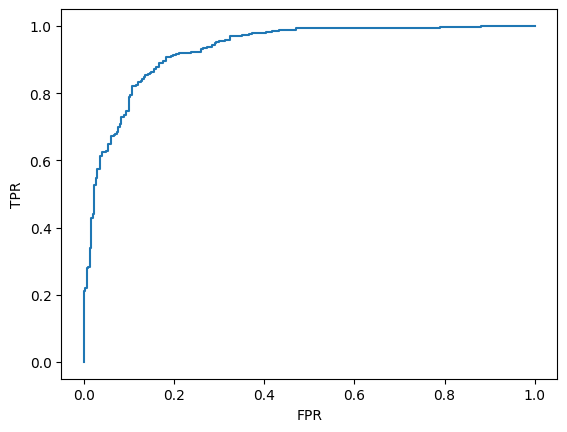

AUROC is 93.08 %
Accuracy is 85.63 %




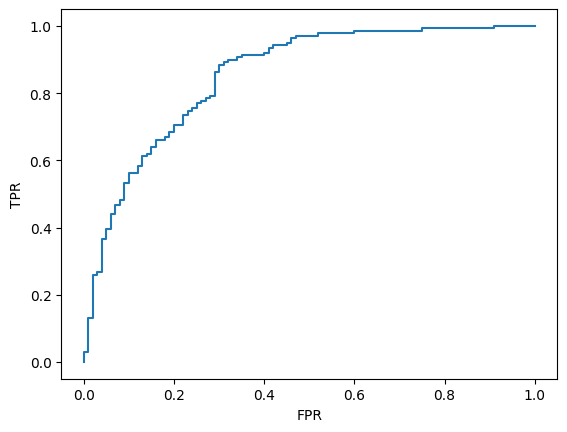

AUROC is 85.25 %
Accuracy is 79.92 %




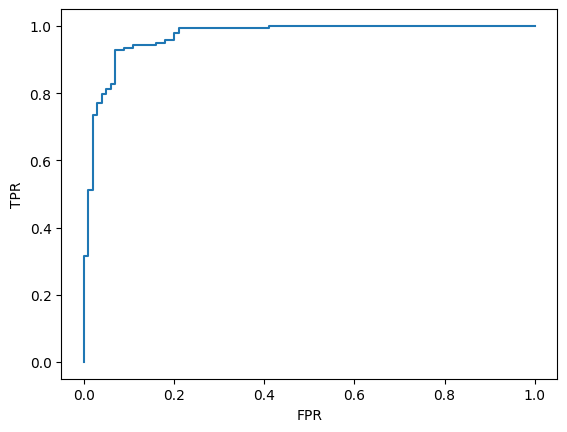

AUROC is 96.86 %
Accuracy is 89.96 %




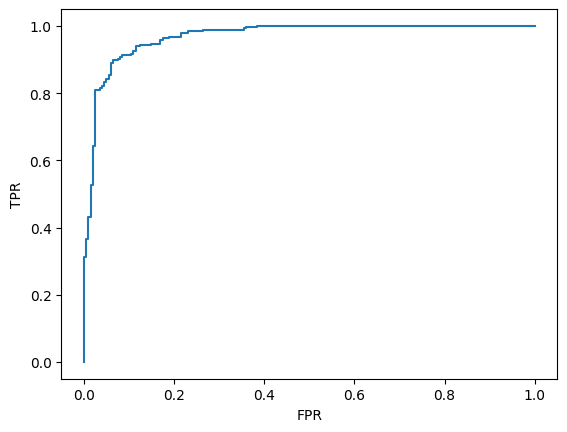

AUROC is 96.87 %
Accuracy is 90.59 %




In [ ]:
# SVM classifier

svm = LinearSVC(labelCol='Label', featuresCol='features')

paramGrid = ParamGridBuilder() \
    .addGrid(svm.maxIter, [1, 10, 50, 100]) \
    .addGrid(svm.regParam, [0.0, 0.01, 0.1]) \
    .build()

# Create the cross-validator
cross_validator = CrossValidator(estimator=svm,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5, seed=42)

models = []
accs = []
aurocs = []

for df_train, df_test in zip(df_train_list_f, df_test_list_f):

  model = cross_validator.fit(df_train)
  models.append(model)
  pred = model.transform(df_test)

  # apply platt scaling to convert raw predictions to probabilities
  pred_roc = pred.withColumn('probability', platt_scale_udf('rawPrediction'))

  # roc curve
  y_score = pred_roc.select("probability").rdd.keys().collect()
  y_true = pred_roc.select("Label").rdd.keys().collect()
  fpr, tpr, thresholds = roc_curve(y_true, y_score)

  plt.figure()
  plt.plot(fpr, tpr)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.show()


  # auroc
  auroc = evaluator.evaluate(pred)
  print('AUROC is', round(auroc * 100, 2), '%')
  aurocs.append(auroc)

  # accuracy
  acc = evaluator_multi.evaluate(pred)
  print('Accuracy is', round(acc * 100, 2), '%')
  print("\n")
  accs.append(acc)

In [ ]:
i = 0
for model in models:
  print(model.getEstimatorParamMaps()[np.argmax(model.avgMetrics)])
  model.bestModel.save("svm_model_" + str(i))
  i += 1

{Param(parent='LinearSVC_008c398a05f1', name='maxIter', doc='max number of iterations (>= 0).'): 100, Param(parent='LinearSVC_008c398a05f1', name='regParam', doc='regularization parameter (>= 0).'): 0.0}
{Param(parent='LinearSVC_008c398a05f1', name='maxIter', doc='max number of iterations (>= 0).'): 10, Param(parent='LinearSVC_008c398a05f1', name='regParam', doc='regularization parameter (>= 0).'): 0.0}
{Param(parent='LinearSVC_008c398a05f1', name='maxIter', doc='max number of iterations (>= 0).'): 100, Param(parent='LinearSVC_008c398a05f1', name='regParam', doc='regularization parameter (>= 0).'): 0.01}
{Param(parent='LinearSVC_008c398a05f1', name='maxIter', doc='max number of iterations (>= 0).'): 100, Param(parent='LinearSVC_008c398a05f1', name='regParam', doc='regularization parameter (>= 0).'): 0.0}
